In [ ]:
import pandas as pd
import numpy as np
# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pip install urduhack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 51.0 MB/s eta 0:00:00
  Attempting uninstall: Click
    Found existing installation: click 8.1.3
    Uninstalling click-8.1.3:
      Successfully uninstalled click-8.1.3
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.9.2
    Uninstalling tensorflow-datasets-4.9.2:
      Successfully uninstalled tensorflow-datasets-4.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


89078/89078 [==============================] - 0s 0us/step


In [ ]:
train_data=pd.read_csv('/content/imdb_urdu_reviews_train.csv')
test_data=pd.read_csv('/content/imdb_urdu_reviews_test.csv')

In [ ]:
train_data.head()

test_data.head()

,review,sentiment
0,یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...,negative
1,بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...,negative
2,یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...,negative
3,اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...,positive
4,پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...,positive


In [ ]:
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)

(50000, 2)


In [ ]:
df =  data.copy()
df

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
...,...,...
49995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,positive
49996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,positive
49997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,negative
49998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,positive


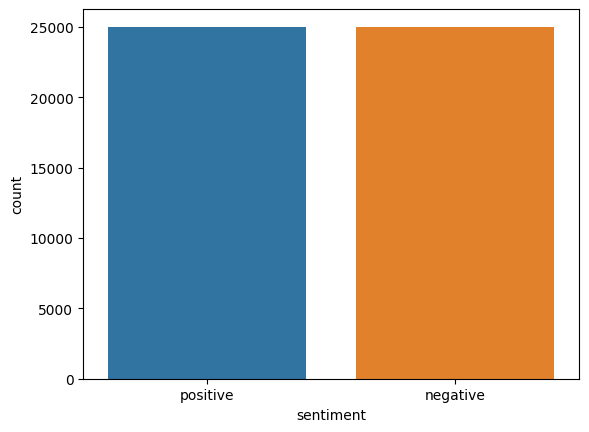

In [ ]:
sns.countplot( x = 'sentiment', data = df );

In [ ]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])

In [ ]:
df['review'] = df['review'].apply(normalize)

In [ ]:
df['review'] = df['review'].apply(remove_accents)

In [ ]:
df['review'] = df['review'].apply(replace_urls)

In [ ]:
df['review'] = df['review'].apply(replace_emails)

In [ ]:
df['review'] = df['review'].apply(replace_currency_symbols)

In [ ]:
df['review'] = df['review'].apply(normalize_whitespace)

In [ ]:
# Remove stop words from text
from typing import FrozenSet

In [ ]:
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())
def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [ ]:
len(STOP_WORDS)

430

In [ ]:
df[['review']].head(10)

,review
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...
5,مجھے اس فلم کا بیشتر حصہ پسند آیا۔ جیسا کہ دوس...
6,ٹھیک ہے ، شاید یہ آسکر کا مستحق نہیں ہے۔ یا گو...
7,میں نے اسے سائنس فائی چینل پر دیکھا۔ یہ پہلے و...
8,یہ فلم ایک ناقص مووی تھی۔ پلاٹ خراب تھا اور کا...
9,یہ ایم جی ایم اور فرینک سناتراس بدترین فلموں م...


In [ ]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "

    return lemme_str

In [ ]:
df['review'] =  df['review'].apply(remove_stopwords)

In [ ]:
df['lemmatized_text'] = df['review'].apply(lemitizeStr)

In [ ]:
df['review'][2], df['lemmatized_text'][2]

('معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ، طیارے ملتے ، جگہ جارہا عرصہ ترک کردیا ، بیوی بچ leftہ چھوڑا تھا۔ ذہنی معذور لڑکے قتل الزام ہے۔ دیکھتے ، اخبار عنوان پکڑا عورت پڑھ ہے۔ بے رحمی ، پوچھتی اخبار رکھ ، خاتون دوسرے حصے پیش ہے۔ ٹھیک ، پوچھا ، عورت چاہتی ، حص giveہ پڑھ ہے۔ میتھیو ریان ہوج پریشان فلم لکھا ہدایت معاشرے کئی عکاسی ہے۔ در حقیقت ، ہوج اشارہ غلط ہے۔ فلم لیلینڈ نوعمر عمر پیش ، خیالی حقیقت فرق کرسکتا ہے۔ بات عیاں انسان قتل ، پیارے معصوم لڑکے مستحق ، ، خاندان مقتول لڑکے کنبہ مہلک نتائج برآمد گے۔ حقیقت ، لیلینڈ پتہ جرم ارتکاب چیز ترغیب توبہ ہے۔ ظاہر والدین طلاق لیلینڈ صدمہ پہنچا ہے۔ باپ متلو .ن آدمی پرواہ تھا۔ پرل ، نوعمر حراستی مرکز استاد نوجوان ہنگامہ دیکھتا مدد چاہتا ، بدقسمتی ، موقع ہے۔ فلم اچھی بات ڈان چیڈل ، عمدہ اداکار ہمیشہ بچاتا ہے۔ . ہوج ہدایت کاری تحت جوڑا کاسٹ اچھ workا کام ہے۔ کیون اسپیس ملزم قاتل مغرور والد کردار ادا اچھا موقع تکبر بیوقوف نفرت ہیں۔ تھوڑی ، فلم جوابات زیادہ سوالات ہے۔',
 'معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ، طیارے ملتے ، جگہ جارہا 

In [ ]:
df[['review', 'lemmatized_text']].head(10)

,review,lemmatized_text
0,80 دہائی وسط کیبل گائیڈ (اسکائینجر ہنٹ پہلو اپ...,80 دہائی وسط کیبل گائیڈ (اسکائینجر ہنٹ پہلو اپ...
1,80 دہائی انسپکٹر گیجٹ کارٹون پسند ، فلم دیکھنے...,80 دہائی انسپکٹر گیجٹ کارٹون پسند ، فلم دیکھنے...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی۔ ٹم تھ...,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی۔ ٹم تھ...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...
5,فلم بیشتر پسند آیا۔ دوسرے جائزوں بتایا اچھی کا...,فلم بیشتر پسند آیا۔ دوسرے جائزوں بتایا اچھی کا...
6,ٹھیک ، آسکر مستحق ہے۔ گولڈن گلوب۔ ایوارڈ ، معا...,ٹھیک ، آسکر مستحق ہے۔ گولڈن گلوب۔ ایوارڈ ، معا...
7,سائنس فائی چینل دیکھا۔ آیا۔ فلم دلچسپی برقرار ...,سائنس فائی چینل دیکھا۔ آیا۔ فلم دلچسپی برقرار ...
8,"فلم ناقص مووی تھی۔ پلاٹ خراب کامیڈی ""کوشش"" خرا...","فلم ناقص مووی تھی۔ پلاٹ خراب کامیڈی ""کوشش"" خرا..."
9,ایم ایم فرینک سناتراس بدترین فلموں چاہئے۔ اوڈ ...,ایم ایم فرینک سناتراس بدترین فلموں چاہئے۔ اوڈ ...


In [ ]:
df.head()

,review,sentiment,encoded_sentiments,lemmatized_text
0,80 دہائی وسط کیبل گائیڈ (اسکائینجر ہنٹ پہلو اپ...,positive,1,80 دہائی وسط کیبل گائیڈ (اسکائینجر ہنٹ پہلو اپ...
1,80 دہائی انسپکٹر گیجٹ کارٹون پسند ، فلم دیکھنے...,negative,0,80 دہائی انسپکٹر گیجٹ کارٹون پسند ، فلم دیکھنے...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی۔ ٹم تھ...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی۔ ٹم تھ...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 7, shuffle = True)

In [ ]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (35000,)
Shape of X_test (15000,)
Shape of Y_train (35000,)
Shape of Y_test (15000,)


In [ ]:
max_feature_num = 50000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
 #check the dimensions of feature vectors
train_vecs.shape, test_vecs.shape

((35000, 50000), (15000, 50000))

In [ ]:
print(train_vecs.shape)  # Check the dimensions of train_vecs
print(test_vecs.shape)  # Check the dimensions of test_vecs

(35000, 50000)
(15000, 50000)


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split

# # Load the dataset
# df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your actual dataset file

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size=0.3, random_state=7, shuffle=True)

# Preprocess the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

max_length = 100  # Specify the maximum sequence length for padding

X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))



Epoch 1/10
1094/1094 [==============================] - 565s 514ms/step - loss: 0.5745 - accuracy: 0.7028 - val_loss: 0.5487 - val_accuracy: 0.7618
Epoch 2/10
1094/1094 [==============================] - 562s 514ms/step - loss: 0.5090 - accuracy: 0.7570 - val_loss: 0.4292 - val_accuracy: 0.8104
Epoch 3/10
1094/1094 [==============================] - 564s 515ms/step - loss: 0.3852 - accuracy: 0.8345 - val_loss: 0.4230 - val_accuracy: 0.8179
Epoch 4/10
1094/1094 [==============================] - 562s 514ms/step - loss: 0.3618 - accuracy: 0.8518 - val_loss: 0.3677 - val_accuracy: 0.8389
Epoch 5/10
1094/1094 [==============================] - 559s 511ms/step - loss: 0.2962 - accuracy: 0.8804 - val_loss: 0.3547 - val_accuracy: 0.8475
Epoch 6/10
1094/1094 [==============================] - 560s 512ms/step - loss: 0.2512 - accuracy: 0.9016 - val_loss: 0.3579 - val_accuracy: 0.8474
Epoch 7/10
1094/1094 [==============================] - 559s 511ms/step - loss: 0.2132 - accuracy: 0.9203 - val_

In [ ]:
from sklearn.metrics import classification_report

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).flatten().astype(int)

# Convert encoded sentiments back to original labels (if needed)
# Replace 'label_mapping' with your actual label mapping dictionary
label_mapping = {0: 'negative', 1: 'positive'}
Y_test_labels = [label_mapping[label] for label in Y_test]
y_pred_labels = [label_mapping[label] for label in y_pred]

# Generate classification report
report = classification_report(Y_test_labels, y_pred_labels)
print(report)



469/469 [==============================] - 28s 55ms/step
              precision    recall  f1-score   support

    negative       0.82      0.85      0.83      7470
    positive       0.84      0.82      0.83      7530

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Test Loss: 0.568087100982666
Test Accuracy: 0.8329333066940308


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size=0.3, random_state=7, shuffle=True)

# Preprocess the data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

max_length = 100  # Specify the maximum sequence length for padding

X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Build the Bi-LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_length))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).flatten().astype(int)

# Convert encoded sentiments back to original labels (if needed)
# Replace 'label_mapping' with your actual label mapping dictionary
label_mapping = {0: 'negative', 1: 'positive'}
Y_test_labels = [label_mapping[label] for label in Y_test]
y_pred_labels = [label_mapping[label] for label in y_pred]

# Generate classification report
report = classification_report(Y_test_labels, y_pred_labels)
print(report)


Epoch 1/10
1094/1094 [==============================] - 736s 669ms/step - loss: 0.4234 - accuracy: 0.8016 - val_loss: 0.3499 - val_accuracy: 0.8491
Epoch 2/10
1094/1094 [==============================] - 776s 710ms/step - loss: 0.3011 - accuracy: 0.8756 - val_loss: 0.3617 - val_accuracy: 0.8406
Epoch 3/10
1094/1094 [==============================] - 795s 727ms/step - loss: 0.2384 - accuracy: 0.9040 - val_loss: 0.3785 - val_accuracy: 0.8433
Epoch 4/10
1094/1094 [==============================] - 778s 711ms/step - loss: 0.1758 - accuracy: 0.9329 - val_loss: 0.4526 - val_accuracy: 0.8381
Epoch 5/10
1094/1094 [==============================] - 778s 711ms/step - loss: 0.1198 - accuracy: 0.9561 - val_loss: 0.5580 - val_accuracy: 0.8345
Epoch 6/10
1094/1094 [==============================] - 779s 713ms/step - loss: 0.0840 - accuracy: 0.9711 - val_loss: 0.6117 - val_accuracy: 0.8295
Epoch 7/10
1094/1094 [==============================] - 778s 711ms/step - loss: 0.0607 - accuracy: 0.9791 - val_

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from urduhack.preprocessing import normalize_whitespace, remove_punctuation
from urduhack.tokenization import sentence_tokenizer

# Apply text preprocessing using UrduHack
df['preprocessed_text'] = df['review'].apply(lambda x: ' '.join(sentence_tokenizer(remove_stopwords(remove_punctuation(normalize_whitespace(x))))))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['encoded_sentiments'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_sequence_length = max(max(len(seq) for seq in X_train_sequences), max(len(seq) for seq in X_test_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Define the RNN model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Make predictions on the test data
y_pred_rnn = model.predict(X_test_padded)
y_pred_rnn_classes = (y_pred_rnn > 0.5).astype(int)

# Train base models on the preprocessed training data
base_model1 = RandomForestClassifier(random_state=42)
base_model2 = LogisticRegression(random_state=42)
base_model3 = SVC(random_state=42)

base_model1.fit(X_train_padded, y_train)
base_model2.fit(X_train_padded, y_train)
base_model3.fit(X_train_padded, y_train)

# Make predictions on the test data using base models
y_pred1 = base_model1.predict(X_test_padded)
y_pred2 = base_model2.predict(X_test_padded)
y_pred3 = base_model3.predict(X_test_padded)

# Create stacked features
stacked_features = np.column_stack((y_pred1, y_pred2, y_pred3, y_pred_rnn_classes.flatten()))

# Train the meta-classifier
meta_classifier = RandomForestClassifier(random_state=42)
meta_classifier.fit(stacked_features, y_test)

# Make final predictions using the stacking ensemble
stacked_pred = meta_classifier.predict(stacked_features)

# Calculate the evaluation metrics
precision = precision_score(y_test, stacked_pred)
recall = recall_score(y_test, stacked_pred)
f1 = f1_score(y_test, stacked_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Epoch 1/5
1000/1000 [==============================] - 2845s 3s/step - loss: 0.4204 - accuracy: 0.8121 - val_loss: 0.3424 - val_accuracy: 0.8549
Epoch 2/5
1000/1000 [==============================] - 2830s 3s/step - loss: 0.2142 - accuracy: 0.9191 - val_loss: 0.3497 - val_accuracy: 0.8616
Epoch 3/5
1000/1000 [==============================] - 2765s 3s/step - loss: 0.1233 - accuracy: 0.9572 - val_loss: 0.4314 - val_accuracy: 0.8579
Epoch 4/5
1000/1000 [==============================] - 2757s 3s/step - loss: 0.0786 - accuracy: 0.9735 - val_loss: 0.5047 - val_accuracy: 0.8396
Epoch 5/5
313/313 [==============================] - 207s 660ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.8511764705882353
Recall: 0.8498433829287392
F1-score: 0.8505094043887148
